# Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Linear regression functionality

In [2]:
def j_wb(x, y, w, b):
    m = x.shape[0]
    j = np.sum(((np.dot(x, w) + b) - y) ** 2)
    j /= 2 * m
    return j


def gradient(x, y, w, b):
    m = x.shape[0]
    f_wb = x @ w + b
    e = f_wb - y
    dj_dw = (1 / m) * (x.T @ e)
    dj_db = (1 / m) * np.sum(e)
    return dj_db, dj_dw


def gradient_descent(X, y, alpha, iterations, j_wb=j_wb, gradient=gradient):
    w = np.zeros(X.shape[1])
    b = 0
    Js = []
    for i in range(iterations):
        dj_db, dj_dw = gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        Js.append(j_wb(X, y, w, b))
        if iterations > 0 and i % (iterations // 10) == 0:
            print("Iteration {:4d}: Cost {:8.2f}".format(i, Js[-1]))
    return w, b

Tarining sets

In [3]:
x_train = np.array([0.0, 1, 2, 3, 4, 5])
y_train = np.array([0, 0, 0, 1, 1, 1])

positive & negative conditions based on labels

In [4]:
pos = y_train == 1
neg = y_train == 0

plot positive & negative features

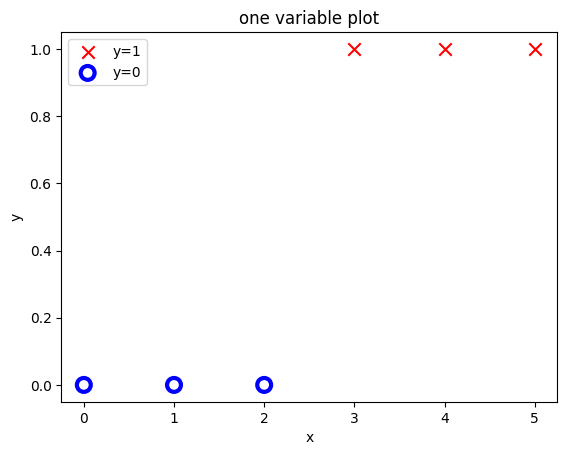

In [5]:
plt.scatter(x_train[pos], y_train[pos], marker="x", s=80, c="red", label="y=1")
plt.scatter(
    x_train[neg],
    y_train[neg],
    marker="o",
    s=100,
    label="y=0",
    facecolors="none",
    edgecolors="blue",
    lw=3,
)
plt.ylabel("y")
plt.xlabel("x")
plt.title("one variable plot")
plt.legend()
plt.show()

Use linear regression model for classification

In [6]:
w, b = gradient_descent(x_train.reshape(-1, 1), y_train, 0.1, 1000)
predictions = x_train.reshape(-1, 1) @ w + b

Iteration    0: Cost     0.03
Iteration  100: Cost     0.03
Iteration  200: Cost     0.03
Iteration  300: Cost     0.03
Iteration  400: Cost     0.03
Iteration  500: Cost     0.03
Iteration  600: Cost     0.03
Iteration  700: Cost     0.03
Iteration  800: Cost     0.03
Iteration  900: Cost     0.03


plot the linear regression border

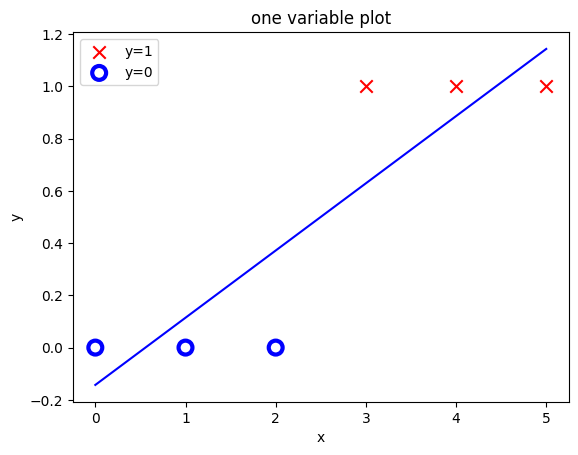

In [7]:
plt.plot(x_train, predictions, c="b")
plt.scatter(x_train[pos], y_train[pos], marker="x", s=80, c="red", label="y=1")
plt.scatter(
    x_train[neg],
    y_train[neg],
    marker="o",
    s=100,
    label="y=0",
    facecolors="none",
    edgecolors="blue",
    lw=3,
)
plt.ylabel("y")
plt.xlabel("x")
plt.title("one variable plot")
plt.legend()
plt.show()

# Sigmoid equassion

e & exp

In [8]:
e = np.e
exp_scaler = np.exp(1)
exp_vector = np.exp([1, 2, 3])
print(e, exp_scaler, exp_vector, sep="\n")

2.718281828459045
2.718281828459045
[ 2.71828183  7.3890561  20.08553692]


Sigmoid equassion

In [9]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

try sigmoid in range -10 -> 10

In [10]:
x = np.arange(-10, 11)
y = sigmoid(x).round(4)
print("Input (x), Output (sigmoid(x))")
print(np.c_[x, y].round(2))

Input (x), Output (sigmoid(x))
[[-10.     0.  ]
 [ -9.     0.  ]
 [ -8.     0.  ]
 [ -7.     0.  ]
 [ -6.     0.  ]
 [ -5.     0.01]
 [ -4.     0.02]
 [ -3.     0.05]
 [ -2.     0.12]
 [ -1.     0.27]
 [  0.     0.5 ]
 [  1.     0.73]
 [  2.     0.88]
 [  3.     0.95]
 [  4.     0.98]
 [  5.     0.99]
 [  6.     1.  ]
 [  7.     1.  ]
 [  8.     1.  ]
 [  9.     1.  ]
 [ 10.     1.  ]]


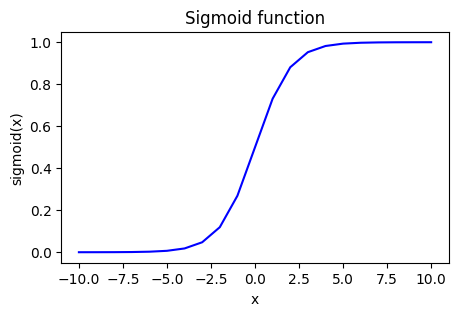

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(x, y, c="b")
ax.set_title("Sigmoid function")
ax.set_ylabel("sigmoid(x)")
ax.set_xlabel("x")
plt.show()

# Decision Boundary

In [12]:
X = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1, 1)

plot data function

In [13]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    pos = y == 1
    neg = y == 0

    # flat the pos & neg array
    pos = pos.reshape(-1,)
    neg = neg.reshape(-1,)
    
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3)
    ax.legend(loc=loc)


plot the data

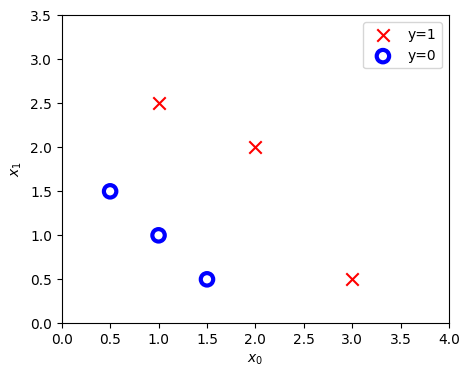

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
plot_data(X, y, ax)
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel("$x_1$")
ax.set_xlabel("$x_0$")
plt.show()

get the model parameters supposing the following w0 = 1, w1 = 1, b = -3<br>: z = x0 + x1 -3<br>
on decision boundary z = 0 so <br>x0 + x1 -3 = 0<br>x1 = 3 - x0

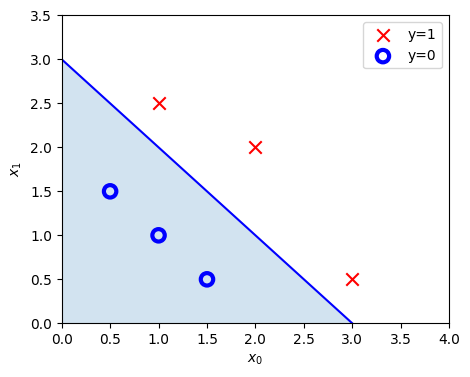

In [15]:
# init x0
x0 = np.arange(0, 6)
x1 = 3 - x0

# Plot the decision boundary
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(x0, x1, c="b")
ax.axis([0, 4, 0, 3.5])

# Fill the region below the line
ax.fill_between(x0, x1, alpha=0.2)

# Plot the original data with plot function
plot_data(X, y, ax)
ax.set_ylabel(r"$x_1$")
ax.set_xlabel(r"$x_0$")
plt.show()

# Logistic Loss & Cost Function

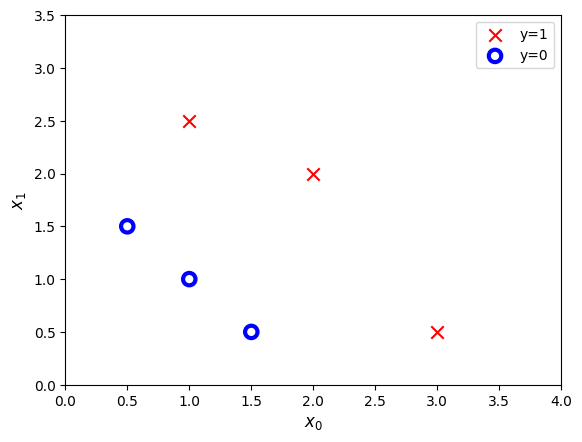

In [16]:
fig, ax = plt.subplots(1, 1)
plot_data(X, y_train, ax)
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel("$x_1$", fontsize=12)
ax.set_xlabel("$x_0$", fontsize=12)
plt.show()

Cost Function

In [17]:
def cost(X, y, w, b):
    m = X.shape[0]
    z = (X @ w) + b
    g = sigmoid(z)
    loss = np.sum(y * np.log(g) + (1 - y) * np.log(1 - g))
    return -loss / m

use cost function

In [18]:
w_tmp = np.array([1, 1])
b_tmp = -3
print(cost(X, y_train, w_tmp, b_tmp))

0.36686678640551745


try defferent b value

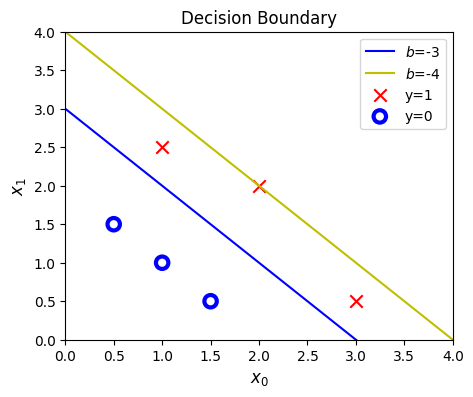

In [19]:
x0 = np.arange(0, 10)

x1 = 3 - x0

x1_other = 4 - x0

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(x0, x1, c="b", label="$b$=-3")
ax.plot(x0, x1_other, c="y", label="$b$=-4")
ax.axis([0, 4, 0, 4])

plot_data(X, y_train, ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel("$x_1$", fontsize=12)
ax.set_xlabel("$x_0$", fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()


compare costs 

In [20]:
w_array1 = np.array([1, 1])
b_1 = -3
w_array2 = np.array([1, 1])
b_2 = -4
print("Cost for b = -3 : ", cost(X, y_train, w_array1, b_1))
print("Cost for b = -4 : ", cost(X, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


# Gradient Decent for logistic regression

Gradient

In [21]:
def gradient(X, y, w, b):
    m = X.shape[0]
    f_wb = sigmoid((X @ w) + b)
    e = f_wb - y
    dj_dw = (1 / m) * X.T @ e
    dj_db = (1 / m) * np.sum(f_wb - y)
    return dj_dw, dj_db

use gradient

In [22]:
y = y.flatten()

w_tmp = np.array([2.0, 3.0])
b_tmp = 1.0
dj_db_tmp, dj_dw_tmp = gradient(X, y, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}")
print(f"dj_dw: {dj_dw_tmp.tolist()}")

dj_db: [0.49833339 0.49883943]
dj_dw: 0.49861806546328574


Gradient Decent

In [23]:
def gradient_descent(X, y, w, b, alpha, num_iters):
    J = []
    for i in range(num_iters):
        dj_dw, dj_db = gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J.append(cost(X, y, w, b))
        if num_iters > 0 and i % (num_iters // 10) == 0:
            print("Iteration {:4d}: Cost {:8.2f}".format(i, J[-1]))
    return w, b

In [24]:
w_tmp = np.zeros_like(X[0])
b_tmp = 0.0
alph = 0.1
iters = 10000
w_out, b_out = gradient_descent(X, y, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: \nw:{w_out}, \nb:{b_out}")

Iteration    0: Cost     0.68
Iteration 1000: Cost     0.16
Iteration 2000: Cost     0.08
Iteration 3000: Cost     0.06
Iteration 4000: Cost     0.04
Iteration 5000: Cost     0.03
Iteration 6000: Cost     0.03
Iteration 7000: Cost     0.02
Iteration 8000: Cost     0.02
Iteration 9000: Cost     0.02

updated parameters: 
w:[5.28123029 5.07815608], 
b:-14.222409982019839


# Logistic Regression with Scikit-learn

In [25]:
from sklearn.linear_model import LogisticRegression

model training 

In [26]:
LGR = LogisticRegression()
LGR.fit(X, y)

LogisticRegression()

make prediction

In [27]:
y_pred = LGR.predict(X)
print(f"Prediction on training set: {y_pred}")

Prediction on training set: [0 0 0 1 1 1]


accuricy

In [28]:
print(f"Accuracy on training set: {LGR.score(X, y) * 100}%")

Accuracy on training set: 100.0%
